In [2192]:
from importlib import reload
import scModel
reload(scModel)
myModel = scModel.Model(Del0=0, mu=2.5, DelA=0.2, t=1, dwave=True)
H = myModel.HBdG()

In [2193]:
myModel.Del0

0

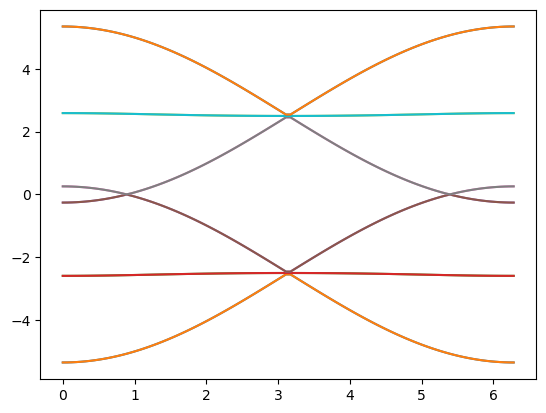

In [2194]:
# Calculating energies along 
import numpy as np
import matplotlib.pyplot as plt

k = np.linspace(0, 2*np.pi, 100)
energies = np.array([np.linalg.eigvalsh(H(k_i, k_i)) for k_i in k])
plt.plot(k, energies)

In [2195]:
k1 = np.ones(100)
k0 = np.zeros(100)
path = np.concatenate((k, k, k*np.sqrt(2)))
kx = np.concatenate((k,np.pi*2*k1, k[::-1]))
ky = np.concatenate((k0, k, k[::-1]))

p = [i for i in range(np.shape(path)[0])]
np.shape(p)
energies = myModel.solvHam(kx, ky)
np.shape(energies)

(12, 300)

In [2196]:
emax = np.amax(energies)
emax = emax+0.1*emax

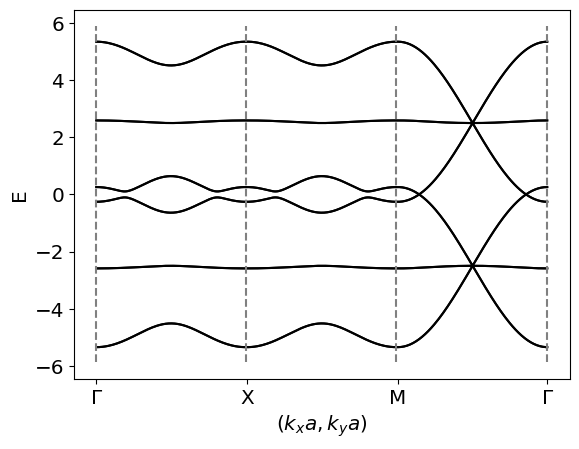

In [2197]:
plt.xlabel("$(k_x a,k_y a)$", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(ticks= [0, 100, 200, 299], labels=[r"$\Gamma$",r"X",r"M", r"$\Gamma$"], size='x-large')
#plt.ylim((-3, 3))

for i in energies:
    plt.plot(p, i, color='black')


plt.vlines([0, 99, 199, 299], [-emax, -emax, -emax, -emax], [emax, emax, emax, emax], colors= 'grey', linestyles='--')

plt.savefig("Pictures/ESCpath.png")
plt.show()

In [2198]:
H(1, 0)[11]

array([ 0. +0.j, -0.4+0.j,  0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,
        0. +0.j,  0. +0.j,  0. +0.j,  0. +0.j,  2. +0.j, -2.5+0.j])

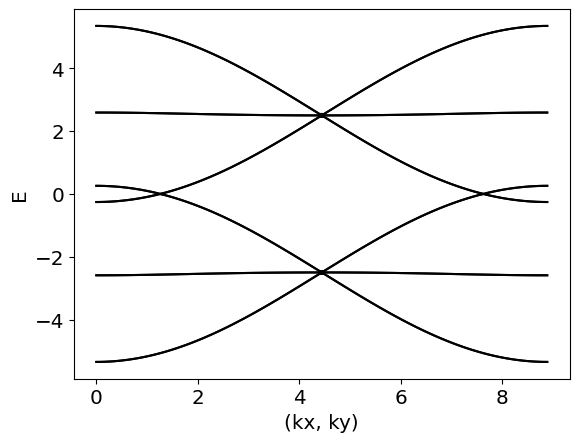

In [2199]:
plt.xlabel("(kx, ky)", size='x-large')
plt.ylabel("E", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')

#k = np.linspace(0, 2*np.pi, 300)
energies = myModel.solvHam(k, k)
for i in energies:
    plt.plot(k*np.sqrt(2), i, color='black')

#plt.plot(k*np.sqrt(2), energies[5], color='black', label='Ich in weird')

#.legend()
plt.savefig("Pictures/Ebands_SC.png")
plt.show()

In [2200]:
np.shape(energies)

(12, 100)

In [2201]:
energies

array([[-5.34888564, -5.34744478, -5.34312368, ..., -5.34312368,
        -5.34744478, -5.34888564],
       [-5.34888564, -5.34744478, -5.34312368, ..., -5.34312368,
        -5.34744478, -5.34888564],
       [-2.59092207, -2.59079405, -2.59041111, ..., -2.59041111,
        -2.59079405, -2.59092207],
       ...,
       [ 2.59092207,  2.59079405,  2.59041111, ...,  2.59041111,
         2.59079405,  2.59092207],
       [ 5.34888564,  5.34744478,  5.34312368, ...,  5.34312368,
         5.34744478,  5.34888564],
       [ 5.34888564,  5.34744478,  5.34312368, ...,  5.34312368,
         5.34744478,  5.34888564]])

In [2202]:
E = myModel.Es(k)
emax=np.amax(energies)
Earr = np.linspace(-emax-1,emax+1,200)
#Earr = np.linspace(-emax-1,emax+1,200)
emax

5.348885642855478

In [2203]:
E

array([[-5.4342983 , -5.4342983 , -3.54391772, ..., -5.34600615,
        -5.34816531, -5.34888564],
       [-0.72308833, -0.72308833,  0.72308833, ..., -5.34600615,
        -5.34816531, -5.34888564],
       [ 3.41738817,  3.41738817,  5.19354464, ..., -2.59066605,
        -2.59085803, -2.59092207],
       ...,
       [-4.9373826 , -4.9373826 , -3.26108015, ...,  2.59066605,
         2.59085803,  2.59092207],
       [-0.73849038, -0.73849038,  0.73849038, ...,  5.34600615,
         5.34816531,  5.34888564],
       [ 3.51188837,  3.51188837,  5.37123416, ...,  5.34600615,
         5.34816531,  5.34888564]])

In [2204]:
Earr

array([-6.34888564, -6.28507775, -6.22126985, -6.15746196, -6.09365406,
       -6.02984616, -5.96603827, -5.90223037, -5.83842248, -5.77461458,
       -5.71080668, -5.64699879, -5.58319089, -5.519383  , -5.4555751 ,
       -5.3917672 , -5.32795931, -5.26415141, -5.20034352, -5.13653562,
       -5.07272772, -5.00891983, -4.94511193, -4.88130404, -4.81749614,
       -4.75368825, -4.68988035, -4.62607245, -4.56226456, -4.49845666,
       -4.43464877, -4.37084087, -4.30703297, -4.24322508, -4.17941718,
       -4.11560929, -4.05180139, -3.98799349, -3.9241856 , -3.8603777 ,
       -3.79656981, -3.73276191, -3.66895401, -3.60514612, -3.54133822,
       -3.47753033, -3.41372243, -3.34991454, -3.28610664, -3.22229874,
       -3.15849085, -3.09468295, -3.03087506, -2.96706716, -2.90325926,
       -2.83945137, -2.77564347, -2.71183558, -2.64802768, -2.58421978,
       -2.52041189, -2.45660399, -2.3927961 , -2.3289882 , -2.2651803 ,
       -2.20137241, -2.13756451, -2.07375662, -2.00994872, -1.94

In [2205]:
np.shape(E)
#E

(12, 10100)

In [2206]:
DOS1 = myModel.DOS(Earr, k, 0.4e-1)

In [2207]:
energies[ np.abs(energies) < 0.3 ] 

array([-0.25796357, -0.25665073, -0.25271258, -0.24615026, -0.23696577,
       -0.22516196, -0.21074277, -0.19371327, -0.17407986, -0.15185049,
       -0.12703479, -0.09964433, -0.06969276, -0.03719607, -0.00217273,
       -0.03535611, -0.07536649, -0.11783148, -0.16272108, -0.21000214,
       -0.2596383 , -0.2596383 , -0.21000214, -0.16272108, -0.11783148,
       -0.07536649, -0.03535611, -0.00217273, -0.03719607, -0.06969276,
       -0.09964433, -0.12703479, -0.15185049, -0.17407986, -0.19371327,
       -0.21074277, -0.22516196, -0.23696577, -0.24615026, -0.25271258,
       -0.25665073, -0.25796357, -0.25796357, -0.25665073, -0.25271258,
       -0.24615026, -0.23696577, -0.22516196, -0.21074277, -0.19371327,
       -0.17407986, -0.15185049, -0.12703479, -0.09964433, -0.06969276,
       -0.03719607, -0.00217273, -0.03535611, -0.07536649, -0.11783148,
       -0.16272108, -0.21000214, -0.2596383 , -0.2596383 , -0.21000214,
       -0.16272108, -0.11783148, -0.07536649, -0.03535611, -0.00

In [2208]:
energies[0,0]

-5.348885642855479

In [2209]:
DOS1

array([6.48143823e-135, 3.95667684e-118, 1.90280186e-102, 7.21283771e-088,
       2.15663221e-074, 5.09090796e-062, 9.49888805e-051, 1.40309092e-040,
       1.64422273e-031, 1.53323310e-023, 1.14278268e-016, 6.85551974e-011,
       3.34862666e-006, 1.36032829e-002, 4.80232916e+000, 1.64042314e+002,
       7.38531392e+002, 9.77737059e+002, 9.91335263e+002, 1.00864670e+003,
       1.03390274e+003, 1.06577357e+003, 1.10487651e+003, 1.15306209e+003,
       1.21381505e+003, 1.29376428e+003, 1.40755375e+003, 1.60284159e+003,
       2.00720273e+003, 2.08339701e+003, 1.55676465e+003, 1.25318204e+003,
       1.08192278e+003, 9.58959555e+002, 8.62359172e+002, 7.82705998e+002,
       7.14922653e+002, 6.55922782e+002, 6.03677606e+002, 5.56776593e+002,
       5.14197535e+002, 4.75173676e+002, 4.39112526e+002, 4.05548059e+002,
       3.74108479e+002, 3.44490359e+002, 3.16439995e+002, 2.89742325e+002,
       2.64213935e+002, 2.39697630e+002, 2.16057279e+002, 1.93173553e+002,
       1.70940266e+002, 1

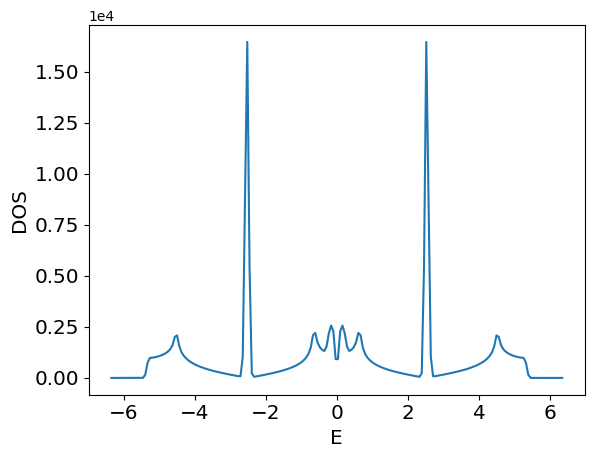

In [2210]:
plt.xlabel("E", size='x-large')
plt.ylabel("DOS", size='x-large')
plt.yticks(size='x-large')
plt.xticks(size='x-large')
plt.ticklabel_format(axis='y', style='sci', scilimits=(-3, 3))
#plt.ylim(0, 1e5)
plt.plot(Earr, DOS1)
#plt.vlines([emax, -emax], 0, 100, colors='black')

plt.savefig("Pictures/DOS_SC.png")
plt.show()